## Recognising handwritten Digits using Random Forests Classifier
<hr/>

## Importing Libraries

In [1]:
import numpy as np, pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
#helper function
def score(yac, ypre):
    return math.sqrt(mean_squared_error(yac,ypre))

## Loading the datasets into DataFrames

In [3]:
h_test = pd.read_csv('handwritten_test.csv')
h_train = pd.read_csv('handwritten_train.csv')

In [4]:
h_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
h_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
h_train.iloc[:,0].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

### Seperating the dependent and independent variables

In [7]:
y = h_train['label']
x = h_train.loc[:, h_train.columns != 'label']
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split the Dataset into Training and Testing

- Training part to train the model.
- Testing for the validation of the model.

In [8]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.2, random_state=42)

In [9]:
rfc = RandomForestClassifier()
rfc.fit(xtr,ytr)

RandomForestClassifier()

## Evaluation of models accuracy

In [10]:
ypre = rfc.predict(xte)
print(score(yte, ypre))

0.8079957567073869


In [11]:
print('validation accuracy :',accuracy_score(yte, ypre))

validation accuracy : 0.9628571428571429


<AxesSubplot:>

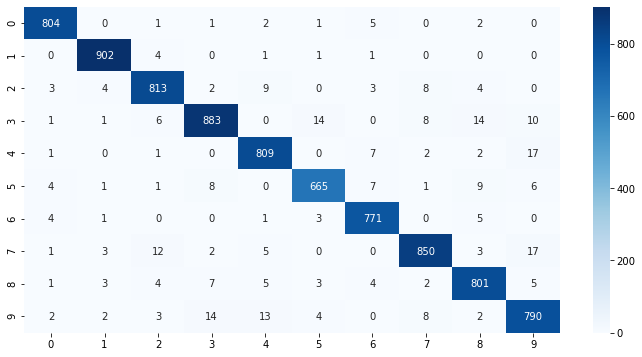

In [12]:
confusion_mat = confusion_matrix(yte, ypre)

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(confusion_mat, fmt='d', annot=True, ax=ax, cmap='Blues')

## Looking a cases where the model failed to recognise the digit

In [15]:
yte = yte.reset_index(drop=True)
xte = xte.reset_index(drop=True)
print(yte.index==xte.index)

[ True  True  True ...  True  True  True]


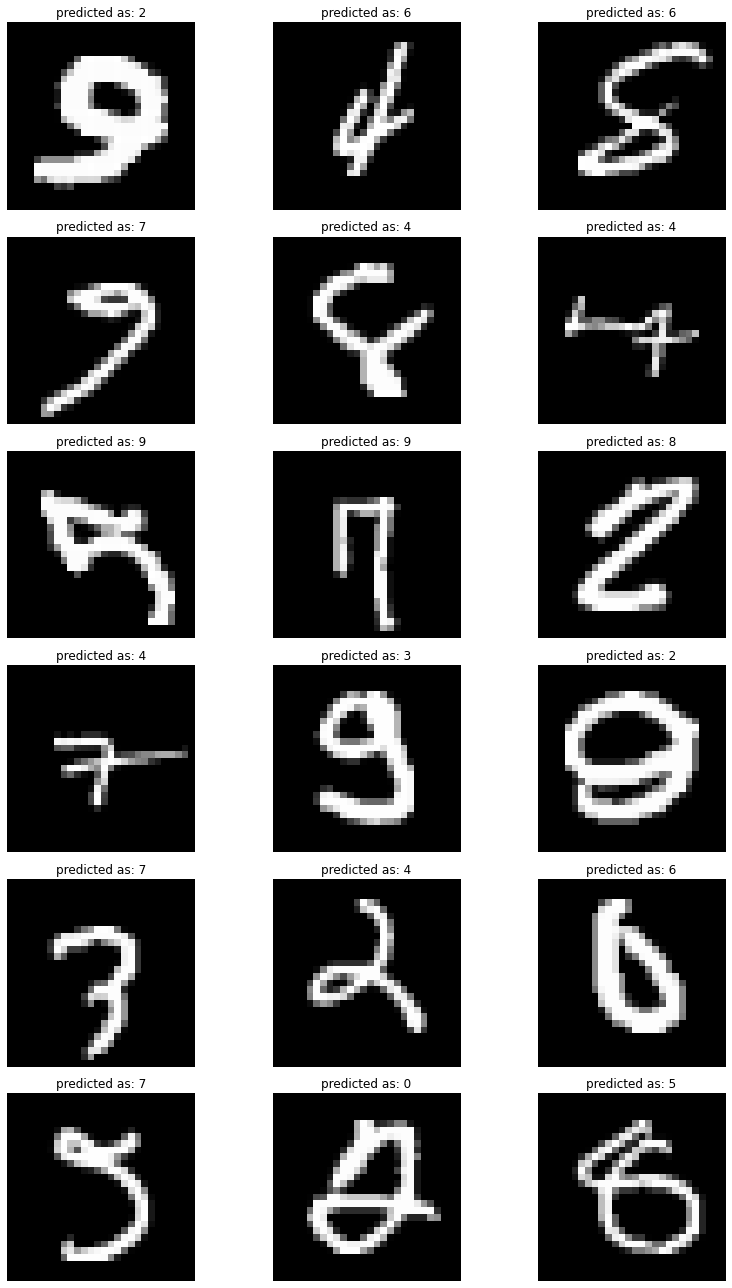

In [30]:
y_unrec = np.array(yte[yte != ypre].index)[:18]

fig, axs = plt.subplots(nrows=6 ,ncols = 3, figsize=(12,18))
for ind,ax in zip(y_unrec, axs.ravel()):
    ax.imshow(np.array(xte.iloc[ind, :]).reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title('predicted as: '+str(ypre[ind]))
fig.tight_layout()

## let's go for predicting the actual testing data

In [31]:
ypre_test = rfc.predict(h_test)

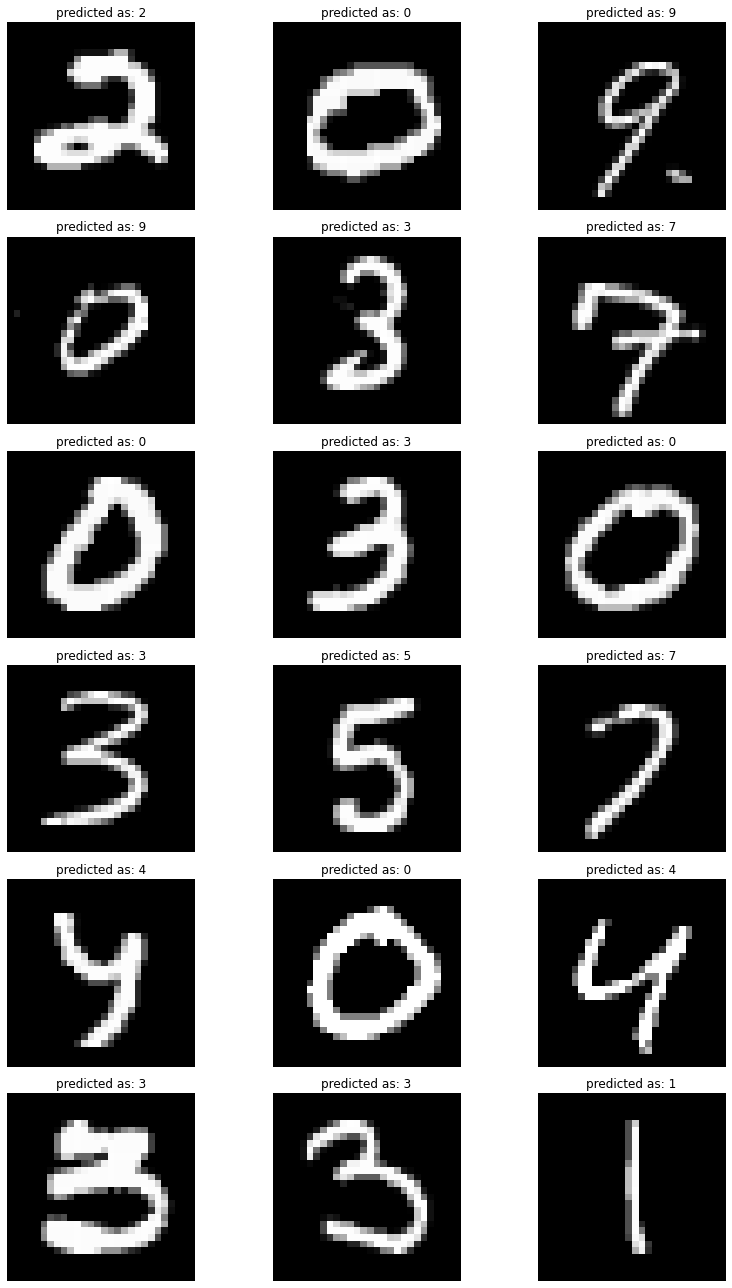

In [32]:
fig, axs = plt.subplots(nrows=6 ,ncols = 3, figsize=(12,18))
for ind,ax in zip(range(18), axs.ravel()):
    ax.imshow(np.array(h_test.iloc[ind, :]).reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title('predicted as: '+str(ypre_test[ind]))
fig.tight_layout()